In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\Laurence\\Documents\\TF_Keras crash course\Housing_follow_along\\kc_house_data.csv")

In [5]:
df.describe().transpose()

#important to sort the data before trying to remove a top/bottom % 
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [8]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [9]:
len(df)*0.1

2161.3

In [10]:
ten_percent_trimmed = df.sort_values('price', ascending=False).iloc[2161:]

In [11]:
ten_percent_trimmed['price'].describe()   #we can see that removing the top 10% massively reduces the max house price, so loads of outliers

# but have we consequently change the geography of our sample?

count     19452.000000
mean     450756.407979
std      177716.651764
min       75000.000000
25%      310000.000000
50%      425000.000000
75%      571500.000000
max      887000.000000
Name: price, dtype: float64

In [12]:
ten_percent_trimmed = ten_percent_trimmed.drop('id', axis=1)
ten_percent_trimmed['date'] = pd.to_datetime(ten_percent_trimmed['date'])  # this will allow us to extract info such as the year or month.

ten_percent_trimmed['year'] = ten_percent_trimmed['date'].apply(lambda date: date.year)

ten_percent_trimmed['month'] = ten_percent_trimmed['date'].apply(lambda date: date.month)

ten_percent_trimmed = ten_percent_trimmed.drop('date', axis=1)
ten_percent_trimmed = ten_percent_trimmed.drop('zipcode', axis=1) 

In [14]:
Xn = ten_percent_trimmed.drop(['price'], axis = 1).values
Yn = ten_percent_trimmed['price'].values  

Xn_train, Xn_test, Yn_train, Yn_test = train_test_split(Xn, Yn, test_size=0.3, random_state=101)
#testing testing

In [20]:
Xn_train

array([[4.0000e+00, 2.5000e+00, 2.5200e+03, ..., 1.0133e+04, 2.0140e+03,
        1.0000e+01],
       [4.0000e+00, 2.5000e+00, 2.4200e+03, ..., 7.2000e+03, 2.0140e+03,
        1.0000e+01],
       [3.0000e+00, 1.0000e+00, 1.2300e+03, ..., 6.6000e+03, 2.0150e+03,
        1.0000e+00],
       ...,
       [3.0000e+00, 1.5000e+00, 1.9400e+03, ..., 9.9360e+03, 2.0140e+03,
        7.0000e+00],
       [2.0000e+00, 1.0000e+00, 1.2400e+03, ..., 1.1393e+04, 2.0150e+03,
        3.0000e+00],
       [4.0000e+00, 2.7500e+00, 3.5270e+03, ..., 7.2000e+03, 2.0150e+03,
        1.0000e+00]])

In [23]:
#NEED TO SCALE THE DATA!!

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
Xn_train = scaler.fit_transform(Xn_train)
Xn_test = scaler.transform(Xn_test)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
model = Sequential()
model.add(Dense (19, activation='relu'))
model.add(Dense (19, activation='relu'))
model.add(Dense (19, activation='relu'))
model.add(Dense (19, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mse')

model.fit(x=Xn_train, y=Yn_train,
          validation_data=(Xn_test, Yn_test),
          batch_size=128,
          epochs=400)

Epoch 1/400
107/107 [==============================] - 1s 3ms/step - loss: 234222829568.0000 - val_loss: 235985764352.0000
Epoch 2/400
107/107 [==============================] - 0s 2ms/step - loss: 233852649472.0000 - val_loss: 234665066496.0000
Epoch 3/400
107/107 [==============================] - 0s 2ms/step - loss: 228347052032.0000 - val_loss: 221489430528.0000
Epoch 4/400
107/107 [==============================] - 0s 2ms/step - loss: 198334431232.0000 - val_loss: 168315682816.0000
Epoch 5/400
107/107 [==============================] - 0s 2ms/step - loss: 120157839360.0000 - val_loss: 71529791488.0000
Epoch 6/400
107/107 [==============================] - 0s 2ms/step - loss: 40215490560.0000 - val_loss: 23689142272.0000
Epoch 7/400
107/107 [==============================] - 0s 2ms/step - loss: 21781252096.0000 - val_loss: 21256126464.0000
Epoch 8/400
107/107 [==============================] - 0s 2ms/step - loss: 21201913856.0000 - val_loss: 21051361280.0000
Epoch 9/400
107/107 [==

<AxesSubplot:>

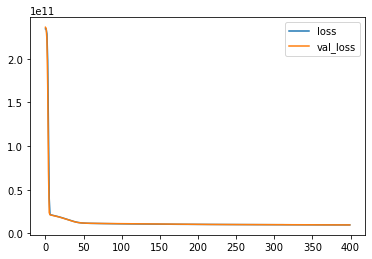

In [30]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [31]:
# series both match. But needn't have gone past 100 epochs

# in order to get any performance stats, need to get the model predictions
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

predictions = model.predict(Xn_test)


183/183 [==============================] - 0s 1ms/step


In [32]:
mean_absolute_error(Yn_test, predictions)

74422.74045124014

In [33]:
ten_percent_trimmed['price'].describe()   # in this case the average error is also quite large in the context of the problem being investigated, but better than in the previous model

count     19452.000000
mean     450756.407979
std      177716.651764
min       75000.000000
25%      310000.000000
50%      425000.000000
75%      571500.000000
max      887000.000000
Name: price, dtype: float64

In [34]:
explained_variance_score(Yn_test, predictions)

0.6932956698960413

In [35]:
# yet this model explains less of the variance. IN a way this make sense, given that our sample of properties are presumably more similar to each other in the full data set - no 7 bed mansions

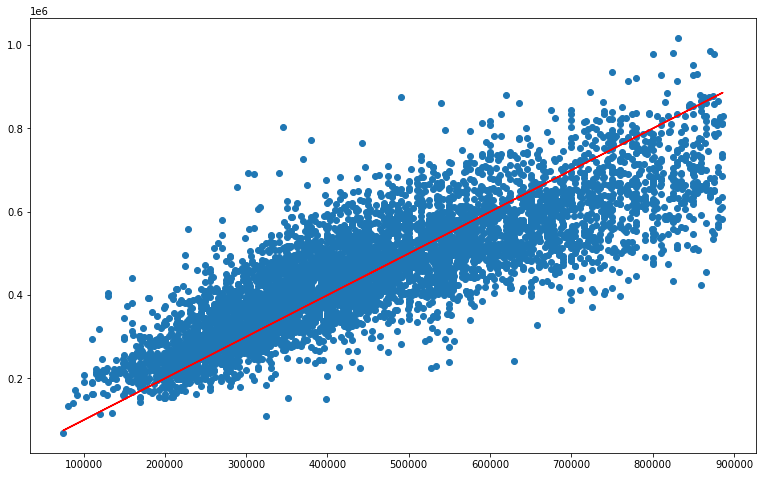

In [36]:
# let's see it visually
plt.figure(figsize=(13, 8))
plt.scatter(Yn_test, predictions)
plt.plot(Yn_test, Yn_test, 'r')

In [38]:
# decent relationship, but data points are quite wide around the 45 deg line

In [ ]:
#let's try estimating a single house

In [48]:
single_house = ten_percent_trimmed.drop(['price'], axis=1).iloc[0]
single_house.values

array([ 3.00000e+00,  2.00000e+00,  3.00000e+03,  2.20400e+04,
        2.00000e+00,  0.00000e+00,  2.00000e+00,  4.00000e+00,
        8.00000e+00,  2.47000e+03,  5.30000e+02,  1.94200e+03,
        0.00000e+00,  4.77745e+01, -1.22368e+02,  2.60000e+03,
        7.94700e+03,  2.01500e+03,  4.00000e+00])

In [50]:
single_house.values.reshape(-1,19)

array([[ 3.00000e+00,  2.00000e+00,  3.00000e+03,  2.20400e+04,
         2.00000e+00,  0.00000e+00,  2.00000e+00,  4.00000e+00,
         8.00000e+00,  2.47000e+03,  5.30000e+02,  1.94200e+03,
         0.00000e+00,  4.77745e+01, -1.22368e+02,  2.60000e+03,
         7.94700e+03,  2.01500e+03,  4.00000e+00]])

In [51]:
single_house = scaler.transform(single_house.values.reshape(-1,19))
model.predict(single_house)

1/1 [==============================] - 0s 17ms/step


array([[866601.06]], dtype=float32)

In [52]:
ten_percent_trimmed.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
19325,887000.0,3,2.00,3000,22040,2.0,0,2,4,8,2470,530,1942,0,47.7745,-122.368,2600,7947,2015,4
16298,887000.0,6,2.25,3830,11180,1.0,0,2,5,9,2440,1390,1962,0,47.5849,-122.113,2500,10400,2014,9
17815,886000.0,4,2.00,2660,3900,1.5,0,0,4,7,1480,1180,1923,0,47.6398,-122.306,2350,3900,2014,6
4660,886000.0,3,2.25,2380,6000,2.0,0,0,5,9,1650,730,1931,0,47.6472,-122.393,2000,6000,2015,3
18454,885250.0,4,2.50,3670,49658,2.0,0,0,3,10,3670,0,1999,0,47.6219,-122.015,3040,49658,2014,7


In [ ]:
# out by around $20k, so not awful